# Unsupervised Learning


Los problemas relacionados con las técnicas de aprendizaje no supervisasdo tieden a ser más retadores. En las tecnicas de aprendizaje supervisado como regresión o clasificación, tenemos una variable que nos ayuda a validar que tan cercano es nuestro modelo a la realidad. En estas técnicas en las que no contamos con un _etiquetado_ en nuestro data set, no hay manera de validar la certeza de nuestros resultados, por eso decimos que esta clase de técnicas son __No Supervisadas__

## Dimensional reduction

### PCA

In [41]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt


This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

A data frame with 50 observations on 4 variables.

Murder numeric Murder arrests (per 100,000)
Assault numeric Assault arrests (per 100,000)
UrbanPop numeric Percent urban population
Rape numeric Rape arrests (per 100,000)

In [20]:
USArrest = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv",
                      index_col=0)
USArrest.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


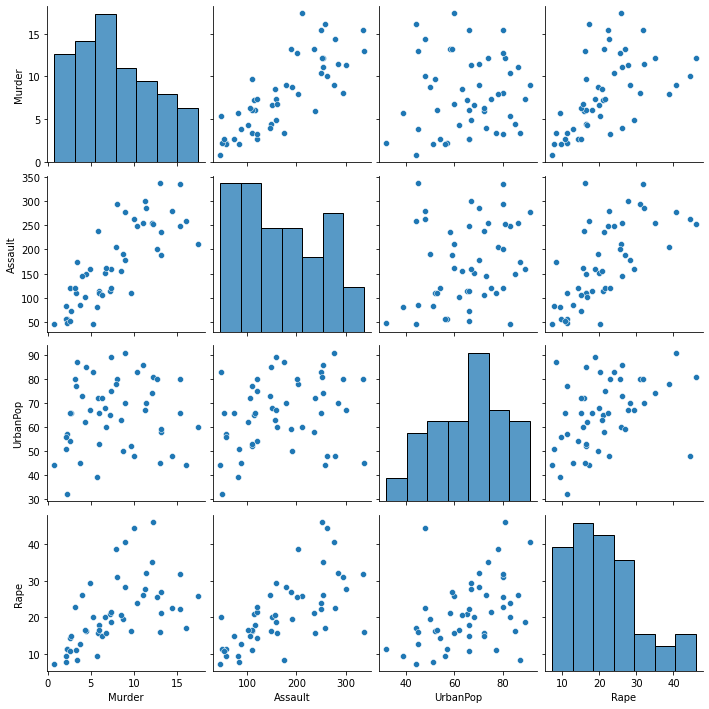

In [22]:
sns.pairplot(USArrest)

Describiendo el problema: 


$$X_{nxp} = X_1,X_2,..., X_p$$
$$n=50, p=4$$

Necesitamos encontrar: 
first principal component
$$Z_{1} = \phi_{1,1}X_1 + \phi_{1,2}X_2,..., \phi{1,p}X_p$$

$$ Maximizar_{\phi_{1,1},...,\phi_{p,1}}[\frac{1}{n}\sum_{i=1}^{n}(\sum_{j=1}^{n}\phi_{j,1}x_{i,j})^2]$$ sujeto a $$\sum_{i=1}^{p}\phi_{j,1}^2 = 1$$

El problema para encontrar $z_2$ funciona de la misma manera, con la restricción de que no debe de haber correlación entre $z_2$ y $z_1$

In [27]:
X = pd.DataFrame(scale(USArrest), index=USArrest.index, columns=USArrest.columns)

In [58]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=USArrest.columns, columns=['V1', 'V2', 'V3', "V4"])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [59]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


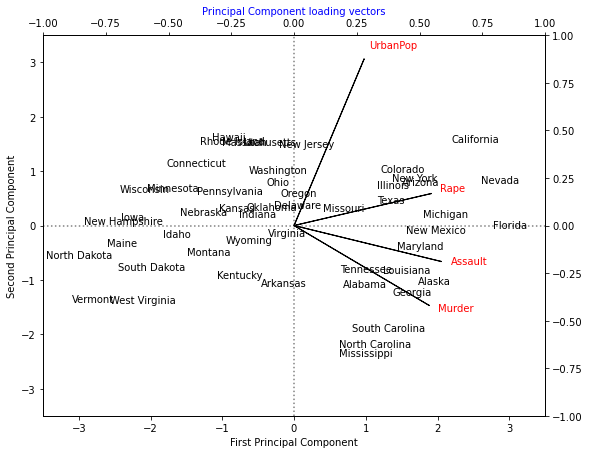

In [45]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='blue')
ax2.set_xlabel('Principal Component loading vectors', color='blue')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])

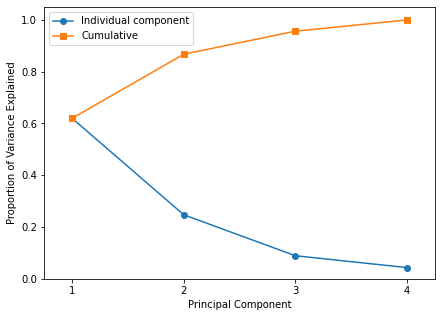

In [60]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2)

In [61]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

## Clustering

### K means

In [143]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [144]:

df = pd.read_csv("housing.csv")

X = df[["longitude","latitude"]]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

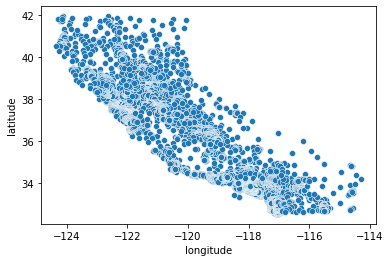

In [145]:
sns.scatterplot(X["longitude"],X["latitude"])

In [155]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(n_clusters=2, n_init=20)

In [148]:
km1.labels_

array([1, 1, 1, ..., 1, 1, 1])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

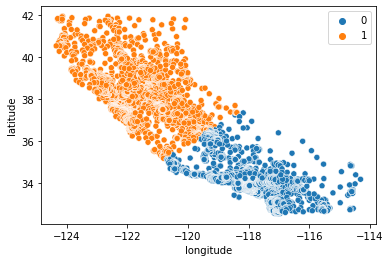

In [149]:
sns.scatterplot(X["longitude"],X["latitude"], hue = km1.labels_ )

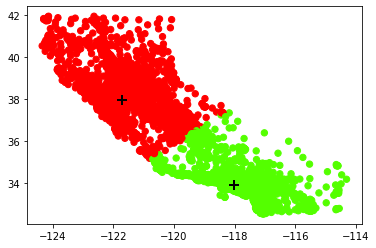

In [160]:
plt.scatter(X["longitude"],X["latitude"], s=40, c=km1.labels_, cmap=plt.cm.prism) 
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

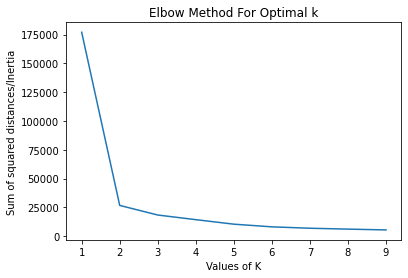

In [150]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

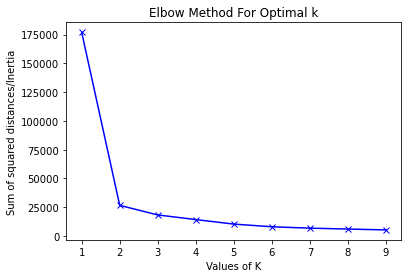

In [142]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

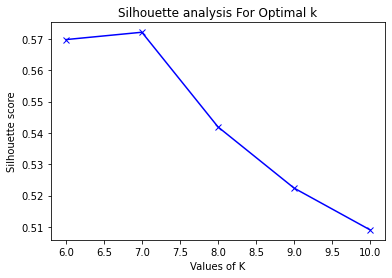

In [139]:
range_n_clusters = [6 , 7, 8, 9,10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_
 
 silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")

plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [161]:
km1 = KMeans(n_clusters=7, n_init=20)
km1.fit(X)

KMeans(n_clusters=7, n_init=20)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

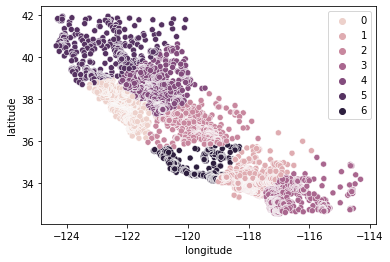

In [162]:
sns.scatterplot(X["longitude"],X["latitude"], hue = km1.labels_ )

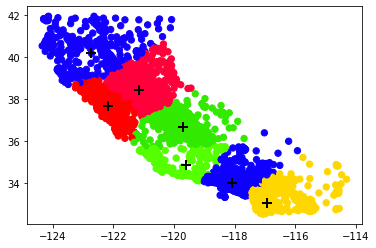

In [163]:
plt.scatter(X["longitude"],X["latitude"], s=40, c=km1.labels_, cmap=plt.cm.prism) 
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)